In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt

In [2]:
train_data = pd.read_table('rating_train_3.txt')
test_data = pd.read_table('Tomboy.txt')

In [3]:
test_data

,id,document,label
0,1,"기자들 리뷰가, 특히 박평식 마저...너무 좋아서 궁금했던 작품. 근데 영화를 보고...",0
1,2,톰보이 너무 좋게 봤어요... 잔잔한 듯 하지만 감정적 스릴러라 불러도 좋을만큼 강...,1
2,3,아이가 자신의 존재와 의미를 온전히 받아들일 때까지 어른은 어떤 자세를 취해야 하는...,2
3,4,햇살처럼 따듯하고 상큼한 영화 . 요즘같은때 보고 힐링하고 싶은영화 . 내 청소년기...,1
4,5,잔의 통통한 손이 카메라에 잡힐때마다귀여움에 죽을뻔함...두 자매의 매력.. 아이의...,1
...,...,...,...
312,313,"역선택을 주의하라고, 일반평점으로 보정합니다",2
313,314,기대를 너무 많이했던 퀴어영화였어요~이제 좀 몰입하려하자니 리사랑 마지막 로레와 마...,1
314,315,솔직히 별로다.. 뭘 전하려는 건지..,2
315,316,어 개별로에요 뭔 교훈따위 1도없고요 갑자기 끝나버림 별점1개도 아까우니까 제발 보...,0


In [4]:
train_data.drop_duplicates(subset=['document'], inplace=True) # 중복데이터 제거
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 29561


In [5]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거  //dropna(how = 'any') 행안에 NA값이 하나라도 있으면 그행을 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인 
print('총 샘플의 수 :',len(train_data))

False
총 샘플의 수 : 29554


In [6]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

,id,document,label
0,9435709,추성훈가족은왜나오구하루네는가족여행특집인가요점점 처음과달라지구있는프로그램ㅡㅇㅡ,0.0
1,9241658,점도 아깝다 도그냥 보지마 절때 보지마,0.0
2,7878193,진심 최고ㅠㅠ 너무 많이 봐서 외울정도,1.0
3,9536876,이성재가 이런 후지고아무내용없는 영화에 왜 출현했는지이해불가,0.0
4,8562549,내려가라 내려가 뭔 이딴영화가 등이야,0.0


In [7]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id           0
document    75
label        0
dtype: int64


In [8]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

29479


In [9]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 317
전처리 후 테스트용 샘플의 개수 : 317
전처리 후 테스트용 샘플의 개수 : 317
전처리 후 테스트용 샘플의 개수 : 316


In [10]:
test_data

,id,document,label
0,1,기자들 리뷰가 특히 박평식 마저너무 좋아서 궁금했던 작품 근데 영화를 보고 나니 그...,0
1,2,톰보이 너무 좋게 봤어요 잔잔한 듯 하지만 감정적 스릴러라 불러도 좋을만큼 강렬하고...,1
2,3,아이가 자신의 존재와 의미를 온전히 받아들일 때까지 어른은 어떤 자세를 취해야 하는...,2
3,4,햇살처럼 따듯하고 상큼한 영화 요즘같은때 보고 힐링하고 싶은영화 내 청소년기 생...,1
4,5,잔의 통통한 손이 카메라에 잡힐때마다귀여움에 죽을뻔함두 자매의 매력 아이의 성장기,1
...,...,...,...
312,313,역선택을 주의하라고 일반평점으로 보정합니다,2
313,314,기대를 너무 많이했던 퀴어영화였어요이제 좀 몰입하려하자니 리사랑 마지막 로레와 마주...,1
314,315,솔직히 별로다 뭘 전하려는 건지,2
315,316,어 개별로에요 뭔 교훈따위 도없고요 갑자기 끝나버림 별점개도 아까우니까 제발 보지마...,0


In [11]:
stopwords = ['아','어','의','을','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','보다','이다','있다']
#불용어는 좀더 찾아보고 추가해봐야할거같음
okt=Okt()

불용어란 자주 등장하지만 데이터를 분석하는데 있어 큰 의미를 갖지 않는 단어들을 뜻합니다. 
불용어는 임의로 설정할 수 도 있고, 영문의 불용어 리스트의 경우 NTLK 라이브러리에서 정의한 불용어 리스트를 사용할 수 있습니다. 
다만 한국어의 경우 조사와 접속사의 사용이 다양하며, 언어의 변형이 많기 때문에 직접 정의하는게 좋습니다.

https://leo-bb.tistory.com/5

In [12]:
X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [13]:
X_test = []
for sentence in test_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [42]:
X_train

array([[   0,    0,    0, ...,   96, 3975, 1233],
       [   0,    0,    0, ...,   59,   15, 5579],
       [   0,    0,    0, ...,   74, 4882,   57],
       ...,
       [   0,    0,    0, ...,  240, 1764,    1],
       [ 615,    9,   40, ...,  330, 5037, 4363],
       [ 325,    1,    6, ...,   64,   42,   30]])

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) #텍스트의 단어 빈도를 기준으로 업데이트

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer


In [15]:
print(tokenizer.word_index)

{'영화': 1, '없다': 2, '너무': 3, '좋다': 4, '만': 5, '적': 6, '다': 7, '같다': 8, '아니다': 9, '재밌다': 10, '않다': 11, '되다': 12, '로': 13, '점': 14, '그냥': 15, '에서': 16, '정말': 17, '연기': 18, '그': 19, '나오다': 20, '스토리': 21, '생각': 22, '진짜': 23, '평점': 24, '안': 25, '것': 26, '인': 27, '만들다': 28, '나': 29, '감동': 30, '못': 31, '지루하다': 32, '내': 33, '왜': 34, '사람': 35, '게': 36, '볼': 37, '그렇다': 38, '고': 39, '내용': 40, '재미': 41, '보고': 42, '더': 43, '배우': 44, '자다': 45, '가다': 46, '요': 47, '말': 48, '최고': 49, '감독': 50, '시간': 51, '재미있다': 52, '하고': 53, '들다': 54, '때': 55, '모르다': 56, '정도': 57, '이렇다': 58, '아깝다': 59, '느낌': 60, 'ㅋㅋ': 61, '주다': 62, '재미없다': 63, '거': 64, '까지': 65, '많다': 66, '별로': 67, '드라마': 68, '뭐': 69, '저': 70, '수': 71, '네': 72, '싶다': 73, '많이': 74, '지': 75, '중': 76, '장면': 77, '마지막': 78, '알다': 79, '성': 80, '기대': 81, '아쉽다': 82, '오다': 83, '작품': 84, '하나': 85, '뻔하다': 86, '소재': 87, '기대하다': 88, '안되다': 89, 'ㅠㅠ': 90, '듯': 91, '솔직하다': 92, '주인공': 93, '연출': 94, '괜찮다': 95, '처음': 96, '임': 97, '하': 98, '나다': 99, '사랑': 100, '돈': 101, '크

In [16]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():#tokenizer.word_counts.items()??
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 20566
등장 빈도가 2번 이하인 희귀 단어의 수: 12531
단어 집합에서 희귀 단어의 비율: 60.93066225809589
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.685433705360505


In [17]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8036


In [18]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)

정수 인코딩 과정에서 vocab_size보다 큰 숫자는 제외된다.
texts_to_sequences(texts)
텍스트의 각 텍스트를 일련의 정수로 변환합니다.

In [43]:
X_train

array([[   0,    0,    0, ...,   96, 3975, 1233],
       [   0,    0,    0, ...,   59,   15, 5579],
       [   0,    0,    0, ...,   74, 4882,   57],
       ...,
       [   0,    0,    0, ...,  240, 1764,    1],
       [ 615,    9,   40, ...,  330, 5037, 4363],
       [ 325,    1,    6, ...,   64,   42,   30]])

In [19]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [20]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [21]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

29321
29321


세로 : 행이 증가하는 방향 (axis = 0)

가로 : 열이 증가하는 방향 (axis = 1)

In [22]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

315
315


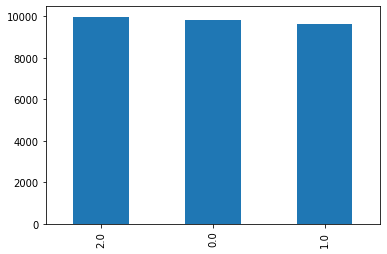

In [23]:
train_data['label'].value_counts().plot(kind = 'bar')

In [24]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0    0.0   9843
1    1.0   9657
2    2.0   9979


In [25]:
print("X_test",X_test.dtype)
print("X_train",X_train.dtype)
print("y_test",y_test.dtype)
print("y_train",y_train.dtype)

X_test object
X_train object
y_test int64
y_train float64


In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
y_test = to_categorical(y_test,num_classes=3)

In [28]:
y_train = to_categorical(y_train,num_classes=3)

리뷰의 최대 길이 : 51
리뷰의 평균 길이 : 10.791275877357526


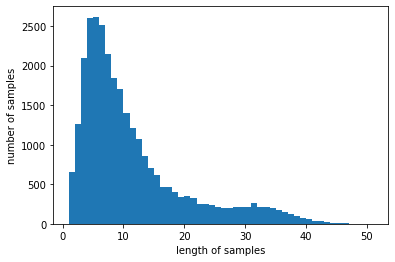

In [29]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [30]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [31]:
max_len = 30
below_threshold_len(max_len, X_train)
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.2839603014904


In [32]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import categorical_accuracy

RMSprop :일반적으로 순환 신경망(Recurrent Neural Networks)의 옵티마이저로 많이 사용됩니다
https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/layers/LSTM

In [33]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=30))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

In [34]:
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         803600    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 921,235
Trainable params: 921,235
Non-trainable params: 0
_________________________________________________________________


In [35]:
hist=model.fit(X_train, y_train, epochs=5, batch_size=60, validation_split=0.2)

Train on 23456 samples, validate on 5865 samples
Epoch 1/5
23456/23456 [==============================] - 8s 356us/sample - loss: 0.7403 - accuracy: 0.6800 - val_loss: 1.2878 - val_accuracy: 0.3976
Epoch 2/5
23456/23456 [==============================] - 8s 324us/sample - loss: 0.5517 - accuracy: 0.7805 - val_loss: 1.8634 - val_accuracy: 0.2522
Epoch 3/5
23456/23456 [==============================] - 8s 326us/sample - loss: 0.4956 - accuracy: 0.8042 - val_loss: 1.8409 - val_accuracy: 0.2963
Epoch 4/5
23456/23456 [==============================] - 7s 316us/sample - loss: 0.4602 - accuracy: 0.8173 - val_loss: 1.9264 - val_accuracy: 0.3042
Epoch 5/5
23456/23456 [==============================] - 8s 322us/sample - loss: 0.4340 - accuracy: 0.8325 - val_loss: 1.9959 - val_accuracy: 0.3026


In [36]:
print("정확도: %.4f" % model.evaluate(X_test, y_test)[1]) 

315/315 [==============================] - 0s 123us/sample - loss: 0.9027 - accuracy: 0.7238
정확도: 0.7238


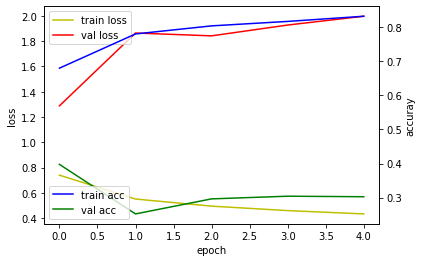

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [38]:
result = model.predict_classes(X_test)

In [39]:
from collections import Counter

freq = Counter(np.array(result).flatten())
freq

Counter({2: 11, 1: 260, 0: 44})

In [40]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

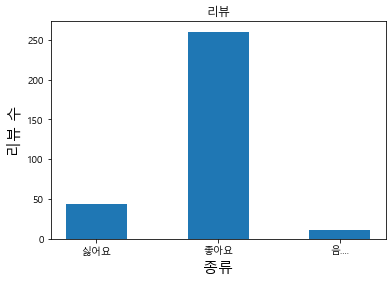

In [41]:
data=(freq[0],freq[1],freq[2])
name=("싫어요","좋아요","음....")


plt.title('리뷰')
plt.bar(name,data,width=0.5)
plt.xlabel('종류',size=15)
plt.ylabel('리뷰 수',size=15)
plt.savefig('Tomboy_review.png', dpi=500)
plt.show()